# Your Grades and GPA at Illinois!

In this lab, you will explore Wade's famous GPA dataset and find out about the easiest, hardest, and most popular courses at Illinois!

The dataset you are using is this lab is actually the same dataset that Prof Wade used to make the GPA visualizations :) Check this out here if you haven't seen it already: [https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/](https://waf.cs.illinois.edu/discovery/grade_disparity_between_sections_at_uiuc/)

# Part 0 | Your Group!

Edit the next Python cell to add information about who you're working within your lab section:

In [2]:
# First, meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Esther"
ca1_name = "Ananya"
ca2_name = "Leon"


# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = "Chrysilla"
partner1_netid = "cfr4"
partner1_major = "Stats&CS"

partner2_name = "Prat"
partner2_netid = "psiyer2"
partner2_major = "Econometrics and Statistics"

partner3_name = "Luke"
partner3_netid = "mateski2"
partner3_major = "Econometrics"

# Part 1 | Basic data manipulation

## Puzzle 1.1: Loading the dataset

For the first part of our lab, we'll be using the GPA dataset, which should be automatically downloaded when you fetch this notebook. 

In the following cell, load the pandas library and read the dataset into `df`.

In [1]:
import pandas as pd
df = pd.read_csv("uiuc-gpa-dataset.csv")
df

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,B-,C+,C,C-,D+,D,D-,F,W,Primary Instructor
0,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,2,13,4,3,...,2,0,3,1,0,0,0,2,0,"Espiritu, Augusto F"
1,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,1,5,9,1,...,1,0,0,1,0,0,0,1,0,"Thomas, Merin A"
2,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,0,7,9,3,...,3,0,0,0,0,0,0,2,0,"Thomas, Merin A"
3,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,0,8,7,1,...,5,1,0,1,1,0,0,0,1,"Lee, Sang S"
4,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,0,7,4,2,...,5,0,2,0,1,0,0,2,0,"Lee, Sang S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48950,2010,Summer,2010-su,STAT,410,Statistics and Probability II,5,10,2,2,...,1,0,1,3,0,0,0,2,1,"Stepanov, Alexei G"
48951,2010,Summer,2010-su,STAT,440,Statistical Data Management,4,12,8,1,...,0,0,0,0,0,0,0,0,0,"Unger, David"
48952,2010,Summer,2010-su,TAM,212,Introductory Dynamics,0,1,3,2,...,7,5,1,1,0,2,0,1,0,"Morgan, William T"
48953,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,1,2,2,1,...,0,3,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie"


## Puzzle 1.2: Adding helper columns

Add two new columns, `"Total Students"` and `"Average GPA"`, that compute the total number of students in each course and the average GPA for each course, respectively.

You should not include students with a `"W"` in either column. The grade point scale can be found at https://registrar.illinois.edu/courses-grades/explanation-of-grades/.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the dot() function; see https://stackoverflow.com/questions/18419962/how-to-compute-weighted-sum-of-all-elements-in-a-row-in-pandas for some examples.</span>

In [22]:
weight = [4, 4, 3.67, 3.33, 3, 2.67, 2.33, 2, 1.67, 1.33, 1, 0.67, 0]
grade = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"]
df["Total Students"] = df[grade].sum(axis=1)
df["Average GPA"] = df[grade].dot(weight) / df["Total Students"]
df

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
0,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,2,13,4,3,...,3,1,0,0,0,2,0,"Espiritu, Augusto F",33,3.232727
1,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,1,5,9,1,...,0,1,0,0,0,1,0,"Thomas, Merin A",22,3.350000
2,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,0,7,9,3,...,0,0,0,0,0,2,0,"Thomas, Merin A",26,3.270385
3,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,0,8,7,1,...,0,1,1,0,0,0,1,"Lee, Sang S",28,3.275000
4,2019,Spring,2019-sp,AAS,100,Intro Asian American Studies,0,7,4,2,...,2,0,1,0,0,2,0,"Lee, Sang S",28,2.965000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48950,2010,Summer,2010-su,STAT,410,Statistics and Probability II,5,10,2,2,...,1,3,0,0,0,2,1,"Stepanov, Alexei G",31,3.183226
48951,2010,Summer,2010-su,STAT,440,Statistical Data Management,4,12,8,1,...,0,0,0,0,0,0,0,"Unger, David",28,3.774643
48952,2010,Summer,2010-su,TAM,212,Introductory Dynamics,0,1,3,2,...,1,1,0,2,0,1,0,"Morgan, William T",28,2.595714
48953,2010,Summer,2010-su,TAM,251,Introductory Solid Mechanics,1,2,2,1,...,3,2,0,0,1,1,0,"Ott-Monsivais, Stephanie",21,2.603333


In [23]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
assert(df[
  (df["YearTerm"] == "2010-su") & \
  (df["Subject"] == "STAT") & \
  (df["Number"] == 410) \
]["Total Students"].sum() == 31), "It appears that your \"Total Students\" column is incorrect."
assert(df[
  (df["YearTerm"] == "2018-fa") & \
  (df["Subject"] == "CS") & \
  (df["Number"] == 225) \
]["Total Students"].sum() == 697), "It appears that your \"Total Students\" column is incorrect."
assert( abs(df[
  (df["YearTerm"] == "2018-fa") & \
  (df["Subject"] == "STAT") & \
  (df["Number"] == 100) \
]["Average GPA"].mean() - 3.247) < 0.01), "It appears that your \"Average GPA\" column is incorrect."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# Part 2 | Finding the easiest and hardest courses

## Puzzle 2.1: Hardest Courses in the Dataset

Based on the `"Average GPA"` column, find the **30 hardest courses** at Illinois, i.e., the 30 courses with the lowest "Average GPA". Store the results in `df_hard_course`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the nsmallest() function</span>

In [24]:
df_hard_course = df.nsmallest(30, "Average GPA")
df_hard_course

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
4111,2018,Fall,2018-fa,LER,120,Contemporary Labor Problems,0,0,1,2,...,1,2,1,1,0,15,0,"Taylor, Don",28,1.142857
16583,2016,Spring,2016-sp,LER,100,Introduction to Labor Studies,0,1,0,1,...,4,1,1,1,1,10,0,"Hawking, Carol J",24,1.319583
24396,2014,Fall,2014-fa,LER,120,Contemporary Labor Problems,0,4,0,1,...,4,1,0,1,0,15,1,"Hershfield, David",30,1.400000
26664,2014,Spring,2014-sp,LER,120,Contemporary Labor Problems,0,1,3,0,...,3,0,0,0,2,11,0,"Cohen, Margaret L",25,1.427600
29461,2013,Fall,2013-fa,MATH,2,Introductory Algebra,0,0,0,0,...,10,5,3,3,2,5,3,"Aydin-Mullen, Yelda",31,1.430645
26739,2014,Spring,2014-sp,MATH,220,Calculus,0,3,0,0,...,5,0,2,1,0,11,1,"Gilbert, Rebekah A",28,1.476071
1407,2019,Spring,2019-sp,LER,100,Introduction to Labor Studies,0,2,1,2,...,0,0,0,2,1,9,0,"Cohen, Margaret L",21,1.491905
14311,2016,Fall,2016-fa,LER,120,Contemporary Labor Problems,0,2,2,1,...,0,1,2,1,2,8,2,"Hershfield, David",22,1.515455
14579,2016,Fall,2016-fa,MCB,245,Human Anat & Physiol Lab I,0,0,0,0,...,3,4,1,2,0,6,1,"Swigart, James P",23,1.522174
24443,2014,Fall,2014-fa,LLS,296,Bilingual US Latina/o Culture,3,1,0,1,...,1,1,1,0,2,11,1,"Romero, Rolando J",27,1.568519


## Puzzle 2.2: "Level" of hardest courses

Find the average `"Number"` of the **30 hardest courses** at Illinois. Store the result as `df_hard_course_avg_no`.

In [25]:
df_hard_course_avg_no = df_hard_course.Number.mean()
df_hard_course_avg_no

161.76666666666668

In [26]:
## == TEST CASES for Puzzle 2.1 and 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell(s), make changes, and RE-RUN your code and then this cell.
assert(abs(df_hard_course_avg_no - 4853/30) < 0.0001), "It appears that your average \"Number\" is incorrect. Please check both Puzzle 2.1 and Puzzle 2.2."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.3: Are the hardest courses really "hard"?

❓ **Individual Reflection Question** ❓ After solving Puzzle 2.1 and 2.2, Joe has the following claim:

"We know that the undergraduate courses are coded from 1 to 499, where a larger number (in the hundreds place) usually implies more advanced materials. Based on Puzzle 2.2, the results in Puzzle 2.1 clearly do not represent the hardest courses at Illinois."

Comment on Joe's claim below.

- I somewhat agree with Joe's claim. I think we should factor in the course number to indicate more advanced materials. Afterall, the students might be doing better in the upper-level courses because they had a good foundation from previous classes. Just taking those upper-level classes right away would be extremely difficult.

❓ **Group Discussion Question** ❓ Discuss Joe's claim with your group and whether or not you agree. How can we improve the analysis in Puzzle 2.1 or 2.2, e.g., using other descriptive statistics? 

## Puzzle 2.4: Easiest Courses in 2019

Based on the `"Average GPA"` column, find the **30 easiest courses in 2019** at Illinois. Store the results in `df_easy_course_2019`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the nlargest() function</span>

In [37]:
df_easy_course_2019 = df[df.Year == 2019]
df_easy_course_2019 = df_easy_course_2019.nlargest(30, "Average GPA")
df_easy_course_2019

,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
2311,2019,Summer,2019-su,IS,532,Theory & Pract Data Cleaning,266,18,1,0,...,0,0,0,0,0,0,0,"Ludaescher, Bertram",286,3.995350
595,2019,Spring,2019-sp,CI,473,Disciplinary Literacy,0,94,2,1,...,0,0,0,0,0,0,0,"Filkins, Scott R",97,3.986289
1118,2019,Spring,2019-sp,FSHN,502,Advanced Sensory Science,34,3,0,1,...,0,0,0,0,0,0,0,"Lee, Soo-Yeun",38,3.982368
1980,2019,Spring,2019-sp,SHS,352,Hearing Health and Society,0,50,0,0,...,0,0,0,0,0,0,0,"Chambers, Ronny D",51,3.980392
1340,2019,Spring,2019-sp,KIN,104,Skating Activities,0,49,0,0,...,0,0,0,0,0,0,1,"Park, Doo Jae",50,3.980000
1911,2019,Spring,2019-sp,REL,208,Cultures & Lits of South Asia,0,46,0,0,...,0,0,0,0,0,0,0,"Mehta, Rini B",47,3.978723
2362,2019,Summer,2019-su,SBC,509,Strategic Media Management,22,17,0,0,...,0,0,0,0,0,0,1,"Yao, Mike Z",40,3.975000
1418,2019,Spring,2019-sp,LER,590,Gov't Reg & Employment Law,1,36,1,1,...,0,0,0,0,0,0,0,"Leroy, Michael H",39,3.974359
2023,2019,Spring,2019-sp,SOCW,297,Asian Families in America,0,38,0,0,...,0,0,0,0,0,0,0,"Balgopal, Anita A",39,3.974359
2298,2019,Summer,2019-su,FSHN,595,Nutrition for Health & Fitness,0,38,0,0,...,0,0,0,0,0,0,0,"Kundrat, Susan M",39,3.974359


In [38]:
## == TEST CASES for Puzzle 2.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
assert( len(df_easy_course_2019) == 30 ), "You should only have the 30 easiest courses in 2019."
assert( abs(df_easy_course_2019["Average GPA"].mean() - 3.9675) < 0.0001 ), "Are you sure you have the 30 easiest courses in 2019?"
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


# Part 3 | Finding Data by Subject

## Puzzle 3.1: Total Number of Grades by Subject

Find the total number of each grade (eg: "A+"s, "A"s, "A-"s, etc.) given by different subjects. Store the results in `df_grouped_subject`.

Hint (double-click this cell to see it): <span style="color:#ffffff00">use the groupby() and agg() function</span>

In [46]:
df_grouped_subject = df.groupby("Subject").agg("sum").reset_index()
df_grouped_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Total Students,Average GPA
0,AAS,314168,20114,592,1787,755,471,446,222,121,111,45,26,28,18,58,24,4680,546.984281
1,ABE,239706,39978,267,2270,748,650,851,226,121,163,46,16,39,5,43,13,5445,413.540485
2,ACCY,4051001,737270,6041,19837,13746,13389,12065,5064,2409,1852,918,208,600,136,453,227,76718,6796.991258
3,ACE,1585229,213623,2466,11620,4550,3898,6123,2375,1484,2025,692,332,584,186,494,95,36829,2584.602275
4,ACES,249729,14464,609,1743,232,90,240,59,59,70,20,11,25,6,62,6,3226,456.138891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,UP,529757,96374,958,3203,1884,1128,1265,449,227,267,108,34,64,39,124,37,9750,917.539459
157,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534
158,VCM,74447,24157,302,1321,29,49,1036,20,18,337,1,1,41,0,1,0,3156,128.099232
159,VM,169227,51001,0,1619,8,0,5283,1,0,3086,0,0,283,0,8,8,10288,238.209547


In [47]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
assert( len(df_grouped_subject) == 161 ), "Are you sure you grouped by subjects?"
assert( df_grouped_subject[ df_grouped_subject["Subject"] == "CS" ]["A"].values[0] == 38472 ), "Are you sure you counted the right number of each subject?"
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Average GPA by Subject

In `df_grouped_subject`, add a new column called `"Overall Average GPA"` that computes the overall GPA of each subject at Illinois.

In [56]:
df_grouped_subject["Overall Average GPA"] = df_grouped_subject[grade].dot(weight) / df_grouped_subject[grade].sum(axis=1)
df_grouped_subject

,Subject,Year,Number,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Total Students,Average GPA,Overall Average GPA
0,AAS,314168,20114,592,1787,755,471,446,222,121,111,45,26,28,18,58,24,4680,546.984281,3.512765
1,ABE,239706,39978,267,2270,748,650,851,226,121,163,46,16,39,5,43,13,5445,413.540485,3.482545
2,ACCY,4051001,737270,6041,19837,13746,13389,12065,5064,2409,1852,918,208,600,136,453,227,76718,6796.991258,3.390063
3,ACE,1585229,213623,2466,11620,4550,3898,6123,2375,1484,2025,692,332,584,186,494,95,36829,2584.602275,3.273144
4,ACES,249729,14464,609,1743,232,90,240,59,59,70,20,11,25,6,62,6,3226,456.138891,3.655050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,UP,529757,96374,958,3203,1884,1128,1265,449,227,267,108,34,64,39,124,37,9750,917.539459,3.455074
157,VB,8040,2489,0,212,6,6,120,1,0,40,0,0,2,0,0,0,387,13.974534,3.448760
158,VCM,74447,24157,302,1321,29,49,1036,20,18,337,1,1,41,0,1,0,3156,128.099232,3.384962
159,VM,169227,51001,0,1619,8,0,5283,1,0,3086,0,0,283,0,8,8,10288,238.209547,2.800547


In [52]:
## == TEST CASES for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error or output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, RE-RUN your code, and then RE-RUN this cell.
assert( abs(df_grouped_subject[ df_grouped_subject["Subject"] == "CS" ]["Overall Average GPA"].values[0] \
    - 3.2494) < 0.0001 ), "Your overall average GPA does not appear to be correct."
## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.3: Visualizing the Grades of Subject Equal to `"STAT"`

Plot a density histogram of the grades (`"A+"` to `"F"`) for the subject `"STAT"`.

Hint (double-click this cell to see it): 
<span style="color:#ffffff00">
    First, extract the row where the subject is "STAT".
    Then, extract the columns "A+" to "F" and divide them by the total number of students.
    Finally, use plot.bar().
</span>

<AxesSubplot:>

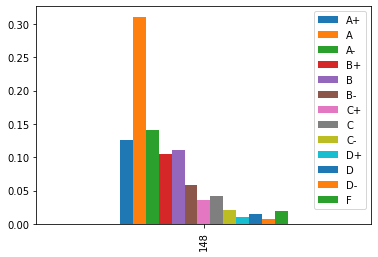

In [79]:
df_stat = df_grouped_subject[df_grouped_subject.Subject == "STAT"]
df_stat_plot = df_stat[grade] / df_stat["Total Students"].values[0]
df_stat_plot.plot.bar()

## Puzzle 3.4: Density Histogram vs. Frequency Histogram

❓ **Individual Reflection Question** ❓ Why should we use density histogram in Puzzle 3.3? Is it meaningful to compare the frequency histogram between different subjects?

- The density helps us see exactly what percentage of students in a class got a certain grade. If you multiply the width*height, you can get the actual percentage of a certain letter grade. If you compare frequency histograms, it may create uneven graphs where one subject has a lot of students, leading to a higher number of A's. Meanwhile, another subject has fewer students, and lower number of A's. This would make it difficult to compare the proportion of letter grades between classes.

❓ **Group Discussion Question** ❓ Think about what types of visualizations would be best for the GPA dataset.  These can be ones we have covered in lecture or other visualizations you are familiar with that we haven't covered in lecture. Discuss your ideas with your groupmates!

## Puzzle 3.5: Find Your Major!

Finally, find your major/subject in the dataset and check out how hard it is! 

Feel free to look around and explore! Part of being a data scientist is being creative and using Python to answer questions that you have.  Write your code below and write comments to explain what your code does. For example, what are the hardest classes in your major that have had at least 50 students?

In [90]:
# Feel free to explore. Credit will be given as long as you try some new code (i.e., not directly copied from any puzzles).
df_cs = df[df.Subject == "CS"]
df_cs["Total Students"] = df_cs[grade].sum(axis=1)
df_cs["Average GPA"] = df_cs[grade].dot(weight) / df_cs["Total Students"]
df_cs.nsmallest(10, "Average GPA")

/var/folders/r2/fn43xny535g24kffxv2c977m0000gn/T/ipykernel_5257/1814470643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs["Total Students"] = df_cs[grade].sum(axis=1)
/var/folders/r2/fn43xny535g24kffxv2c977m0000gn/T/ipykernel_5257/1814470643.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs["Average GPA"] = df_cs[grade].dot(weight) / df_cs["Total Students"]


,Year,Term,YearTerm,Subject,Number,Course Title,A+,A,A-,B+,...,C,C-,D+,D,D-,F,W,Primary Instructor,Total Students,Average GPA
39076,2011,Spring,2011-sp,CS,173,Discrete Structures,2,2,0,5,...,1,3,0,4,1,7,0,"Fleck, Margaret M",29,1.907931
44385,2010,Fall,2010-fa,CS,173,Discrete Structures,0,1,1,3,...,0,5,1,3,3,2,0,"Fleck, Margaret M",28,2.024643
39069,2011,Spring,2011-sp,CS,173,Discrete Structures,0,2,2,2,...,2,2,1,1,1,5,0,"Fleck, Margaret M",28,2.059286
47056,2010,Spring,2010-sp,CS,225,Data Structures,0,4,1,2,...,5,0,0,3,0,5,0,"Karahan, Ibrahim",26,2.192308
23514,2014,Fall,2014-fa,CS,101,Intro Computing: Engrg & Sci,3,0,2,3,...,3,1,5,1,0,6,1,"Gambill, Thomas N",38,2.192632
33510,2012,Fall,2012-fa,CS,241,System Programming,3,29,6,6,...,17,5,4,24,3,21,1,"Kravets, Robin H",153,2.248497
39074,2011,Spring,2011-sp,CS,173,Discrete Structures,2,3,2,7,...,1,2,1,1,1,7,0,"Fleck, Margaret M",31,2.258065
47054,2010,Spring,2010-sp,CS,225,Data Structures,0,6,0,0,...,7,0,0,2,0,4,0,"Karahan, Ibrahim",25,2.266400
44384,2010,Fall,2010-fa,CS,173,Discrete Structures,1,0,4,4,...,2,2,2,2,3,1,1,"Fleck, Margaret M",26,2.282308
23503,2014,Fall,2014-fa,CS,101,Intro Computing: Engrg & Sci,2,1,2,2,...,5,3,2,0,1,4,0,"Gambill, Thomas N",39,2.291282


❓ **Individual Reflection Question** ❓ Explain what you did in Puzzle 3.5 here, as well as what you found!  This is your chance to interpret your results and teach us something that you found interesting :)


I found the 10 CS sections with the lowest GPA. I think I'm going to avoid Fleck, Margaret when signing up for classes.

❓ **Group Discussion Question** ❓ Are there any specific classes here at UIUC that you have heard of that are "hard" or "easy"?  Discuss this with your groupmates and check out their average GPAs. Think about how they compare to the overall average!

# Finale!

You're almost done -- congratulations!

You need to do two more things:

1.  Save your work. To do this, go to File -> Save All

2.  After you have saved, exit this notebook and follow the webpage instructions to commit this lab to your Git repository!